# Attrition Dataset

## Problem Statement:-
#### There are many employees join and leave the jobs that they have. We know why they join aparticular organization but why do they leave?
#### The given dataset basically refers to the same problem. We have to build an algorithm to predict what type of individual is more likely to leave the job and to know what factors/features are important when it comes to the attrition.

In [1]:
# attrition target variable; Y -> already left (1), N -> Not left (0)
# create a classification model (all the basic algorithms)
# should have good tpr and fpr, accuracy, confusion matrix

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the dataset
att = pd.read_csv(r"C:\Users\Ashish Kulkarni\Desktop\Data Science\Python\Programs\Logistic Regression\Attrition.csv")

In [4]:
# display all the features
from IPython.display import display
pd.options.display.max_columns = None

In [5]:
# look at the features and values
att.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [6]:
# check data types
att.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# encoded categorical features to numerical features
# for more granular view, do it manually
att.replace({"Attrition" : {"No" : 0, "Yes" : 1},
            "BusinessTravel" : {"Non-Travel" : 0, "Travel_Frequently" : 1, "Travel_Rarely" : 2},
            "Department" : {"Research & Development" : 0, "Sales" : 1, "Human Resources" : 2},
            "EducationField" : {"Life Sciences" : 0, "Medical" : 1, "Marketing" : 2, "Technical Degree" : 3, "Other" : 4,
                                "Human Resources" : 5},
            "Gender" : {"Male" : 0, "Female" : 1},
            "JobRole" : {"Sales Executive" : 0, "Research Scientist" : 1, "Laboratory Technician" : 2, 
                         "Manufacturing Director" : 3, "Healthcare Representative" : 4, "Manager" : 5,
                         "Sales Representative" : 6, "Research Director" : 7, "Human Resources" : 8},
            "MaritalStatus" : {"Married" : 0, "Single" : 1, "Divorced" : 2},
            "Over18" : {"Y" : 1},
            "OverTime" : {"No" : 0, "Yes" : 1}}, inplace = True)

In [8]:
# check if all the variables are encoded
att.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,1,1,2,0,1,1,2,1,94,3,2,0,4,1,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,0,1,2,3,0,61,2,2,1,2,0,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,0,2,2,4,1,4,4,0,92,2,1,2,3,1,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,0,1,5,4,1,56,3,1,1,3,0,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,0,2,1,1,1,7,1,0,40,3,1,2,2,0,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,0,2,2,0,1,8,4,0,79,3,1,2,4,1,3068,11864,0,1,0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,0,3,3,1,1,10,3,1,81,4,1,2,1,0,2670,9964,4,1,1,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,2,1358,0,24,1,0,1,11,4,0,67,3,1,2,3,2,2693,13335,1,1,0,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,1,216,0,23,3,0,1,12,4,0,44,2,3,3,3,1,9526,8787,0,1,0,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,2,1299,0,27,3,1,1,13,3,0,94,3,2,4,3,0,5237,16577,6,1,0,13,3,2,80,2,17,3,2,7,7,7,7


In [9]:
# check the null values
att.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
# check if the target variable is imbalanced
att.Attrition.value_counts()
# here we can clearly see that the dataset is imbalanced

0    1233
1     237
Name: Attrition, dtype: int64

#### The dataset that we have is imbalanced.
#### To avoid further errors, make it balanced by performing oversampling on it

In [11]:
# perform oversampling
class_imb = att[att.Attrition == 1]

In [273]:
att1 = pd.concat([att, class_imb, class_imb, class_imb, class_imb])

In [274]:
att1.Attrition.value_counts()

0    1233
1    1185
Name: Attrition, dtype: int64

#### Dimensions before and after oversampling

In [275]:
print("Dimensions of Original data --> ", att.shape)
print("Dimensions after solving class imbalance --> ", att1.shape)

Dimensions of Original data -->  (1470, 35)
Dimensions after solving class imbalance -->  (2418, 35)


### Sampling an Splitting the Dataset

In [276]:
att1_x = att1.drop(["Attrition"], axis = 1)
att1_y = att1.iloc[ : , 1]

In [277]:
from sklearn.model_selection import train_test_split
att1_x_train, att1_x_test, att1_y_train, att1_y_test = train_test_split(att1_x, att1_y, test_size = 0.25, random_state = 555)

---

## Logistic Regression

In [229]:
# build the logistic regression model
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression()

In [18]:
logmodel1.fit(att1_x_train, att1_y_train)

C:\Users\Ashish Kulkarni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
pred_log1 = logmodel1.predict(att1_x_test)
pred_log1

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,

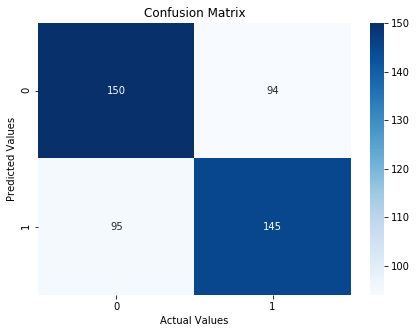

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
tab1 = confusion_matrix(att1_y_test, pred_log1)

plt.figure(figsize =(7,5))
sns.heatmap(tab1, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [21]:
accuracy1 = accuracy_score(pred_log1, att1_y_test)
accuracy1

0.609504132231405

---

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()

In [23]:
dtree1.fit(att1_x_train, att1_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
pred_dt1 = dtree1.predict(att1_x_test)
pred_dt1

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

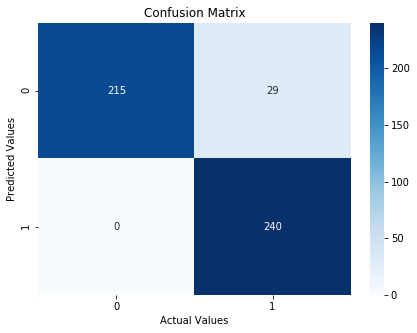

In [25]:
tab2 = confusion_matrix(att1_y_test, pred_dt1)

plt.figure(figsize =(7,5))
sns.heatmap(tab2, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [26]:
accuracy2 = accuracy_score(pred_dt1, att1_y_test)
accuracy2

0.9400826446280992

---

## Random Forest

In [278]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()

In [279]:
rfc1.fit(att1_x_train, att1_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [280]:
pred_rfc1 = rfc1.predict(att1_x_test)
pred_rfc1

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

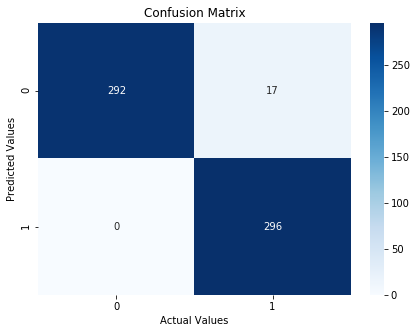

In [281]:
tab3 = confusion_matrix(att1_y_test, pred_rfc1)

plt.figure(figsize =(7,5))
sns.heatmap(tab3, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [282]:
accuracy3 = accuracy_score(pred_rfc1, att1_y_test)
accuracy3

0.971900826446281

---

## Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
naive_bay1 = MultinomialNB()

In [33]:
naive_bay1.fit(att1_x_train, att1_y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
pred_nb1 = naive_bay1.predict(att1_x_test)
pred_nb1

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,

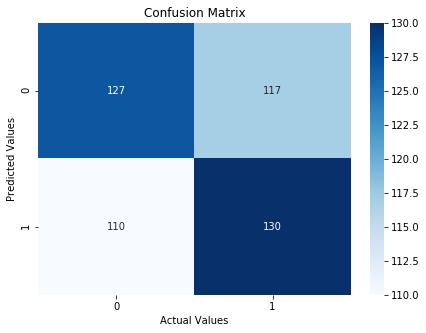

In [35]:
tab4 = confusion_matrix(att1_y_test, pred_nb1)

plt.figure(figsize =(7,5))
sns.heatmap(tab4, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [36]:
accuracy4 = accuracy_score(pred_nb1, att1_y_test)
accuracy4

0.53099173553719

---

## Support Vector Machine

In [37]:
from sklearn.svm import SVC
svm1 = SVC()

In [38]:
svm1.fit(att1_x_train, att1_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
pred_svm1 = svm1.predict(att1_x_test)
pred_svm1

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

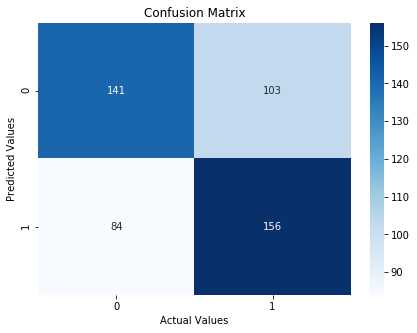

In [40]:
tab5 = confusion_matrix(att1_y_test, pred_svm1)

plt.figure(figsize =(7,5))
sns.heatmap(tab5, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [41]:
accuracy5 = accuracy_score(pred_svm1, att1_y_test)
accuracy5

0.6136363636363636

---

## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors = 7)

In [43]:
knn1.fit(att1_x_train, att1_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [44]:
pred_knn1 = knn1.predict(att1_x_test)
pred_knn1

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,

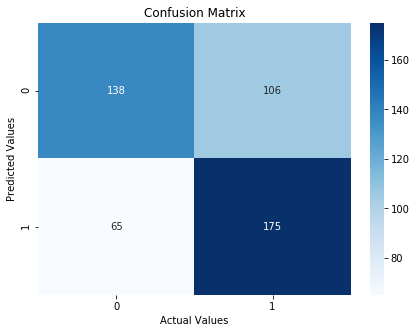

In [45]:
tab6 = confusion_matrix(att1_y_test, pred_knn1)

plt.figure(figsize = (7,5))
sns.heatmap(tab6, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [46]:
accuracy6 = accuracy_score(pred_knn1, att1_y_test)
accuracy6

0.6466942148760331

---

## Feature Selection using Chi_sq Technique

#### Ideally the feature selection is done before splitting the dataset and building the model. But, here, I did it later because I wanted to see if the accuracy and the overall performance increases or decreases after feature selection for this dataset.

In [206]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [207]:
feat_sel = SelectKBest(score_func = chi2, k = 'all')
fitted = feat_sel.fit(att1_x, att1_y)
print(fitted.scores_)

[1.95182035e+02 4.99676615e-06 2.20494020e+03 1.56026097e+01
 1.39344518e+02 1.18837420e+00 1.85397915e+01 0.00000000e+00
 1.32304055e+02 1.60007359e+01 1.77124540e+00 9.80650357e-01
 1.06485523e+01 5.95792608e+01 5.57798420e+00 1.62854186e+01
 3.39340709e-01 3.10147526e+05 2.70324754e+03 1.42858021e+01
 0.00000000e+00 1.18923348e+02 5.34125888e-01 1.14780565e-03
 3.05346491e+00 0.00000000e+00 6.24320112e+01 5.60143757e+02
 7.10844442e+00 2.48517704e+00 3.44883326e+02 2.88675614e+02
 1.77238831e+01 2.71461015e+02]


In [208]:
feature_importance = pd.DataFrame({'Feature' : list(att1_x.columns), 'Importance' : list(fitted.scores_)})
feature_importance.sort_values('Importance', ascending = False)

,Feature,Importance
17,MonthlyIncome,310147.525578
18,MonthlyRate,2703.247535
2,DailyRate,2204.940201
27,TotalWorkingYears,560.143757
30,YearsAtCompany,344.883326
31,YearsInCurrentRole,288.675614
33,YearsWithCurrManager,271.461015
0,Age,195.182035
4,DistanceFromHome,139.344518
8,EmployeeNumber,132.304055


### Remove 'BusinessTravel', 'EmployeeCount', 'StandardHours' and 'Over18' as these features hold close to zero importance in this dataset. Now, try and build Random Forest Algorithm excluding features mentioned above.

---

## Random Forest Model 2

In [283]:
att2_x = att1_x.drop(['BusinessTravel', 'EmployeeCount', 'StandardHours', 'Over18'], axis = 1)
att2_y = att1_y

In [284]:
att2_x_train, att2_x_test, att2_y_train, att2_y_test = train_test_split(att2_x, att2_y, test_size = 0.25,random_state = 555)

In [285]:
rfc2 = RandomForestClassifier()

In [286]:
rfc2.fit(att2_x_train, att2_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [287]:
pred_rfc2 = rfc2.predict(att2_x_test)
pred_rfc2

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

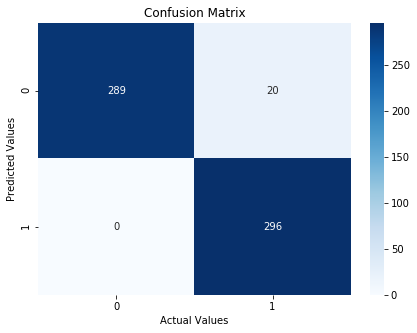

In [288]:
tab7 = confusion_matrix(att2_y_test, pred_rfc2)

plt.figure(figsize =(7,5))
sns.heatmap(tab7, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [289]:
accuracy7 = accuracy_score(pred_rfc2, att2_y_test)
accuracy7

0.9669421487603306

In [290]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [291]:
# to find area under the curve value
att_auc_score = roc_auc_score(att2_y_test, pred_rfc2)
att_auc_score

0.9676375404530744

In [292]:
pred_value_prob = rfc2.predict_proba(att2_x_test)
pred_value_prob = pd.DataFrame(pred_value_prob)
pred_value_prob

,0,1
0,0.22,0.78
1,0.57,0.43
2,0.84,0.16
3,0.84,0.16
4,0.04,0.96
...,...,...
600,0.58,0.42
601,0.71,0.29
602,0.87,0.13
603,0.87,0.13


In [293]:
pred_value_prob = pred_value_prob.iloc[ : , -1]

In [294]:
fpr, tpr, threshold = roc_curve(att2_y_test, pred_value_prob)

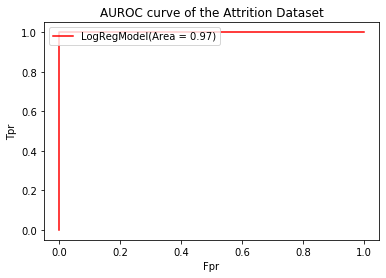

In [295]:
plt.plot(fpr, tpr, color = "red", label = "LogRegModel(Area = %0.2f)" % att_auc_score)
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("AUROC curve of the Attrition Dataset")
plt.legend(loc = "upper left")

### This is the worst case that we can ever have. TPR and FPR can never be constant in real life. Again get the same dataset and don't perform oversampling. Instead use inbuild function for balacing the dataset.

---

In [64]:
att3 = att.iloc[ : , : ]

In [66]:
att3_x = att3.drop(["Attrition"], axis = 1)
att3_y = att3.iloc[ : , 1]

In [67]:
# do the feature selection using chi_sq technique
feat_sel3 = SelectKBest(score_func = chi2, k = 'all')
fitted3 = feat_sel.fit(att3_x, att3_y)
print(fitted3.scores_)

[8.41552768e+01 2.20269350e-06 9.56580494e+02 7.31031364e+00
 6.37721416e+01 5.20642224e-01 8.49975816e+00 3.40841167e-30
 5.81203260e+01 6.89059434e+00 7.65129816e-01 4.31779090e-01
 4.60561607e+00 2.49392423e+01 2.42411197e+00 7.01194663e+00
 1.50549733e-01 1.27922294e+05 1.19663355e+03 6.43865444e+00
 3.40841167e-30 6.38450667e+01 2.35026858e-01 5.06064443e-04
 1.33233286e+00 0.00000000e+00 2.52688260e+01 2.30721618e+02
 3.08579616e+00 1.08554296e+00 1.42100054e+02 1.17522596e+02
 7.60172347e+00 1.10671534e+02]


In [68]:
feature_importance3 = pd.DataFrame({'Feature' : list(att3_x.columns), 'Importance' : list(fitted3.scores_)})
feature_importance3.sort_values('Importance', ascending = False)

,Feature,Importance
17,MonthlyIncome,1.279223e+05
18,MonthlyRate,1.196634e+03
2,DailyRate,9.565805e+02
27,TotalWorkingYears,2.307216e+02
30,YearsAtCompany,1.421001e+02
31,YearsInCurrentRole,1.175226e+02
33,YearsWithCurrManager,1.106715e+02
0,Age,8.415528e+01
21,OverTime,6.384507e+01
4,DistanceFromHome,6.377214e+01


### Drop 'EmployeeCount', 'Over18', 'StandardHours' and build all the classification algorithms.

In [73]:
att3_x = att3.drop(['Attrition', 'EmployeeCount', 'Over18', 'StandardHours'], axis = 1)
att3_y = att3.iloc[ : , 1]

In [ ]:
att3_x_train, att3_x_test, att3_y_train, att3_y_test = train_test_split(att3_x, att3_y, test_size = 0.2, random_state = 555)

---

## Logistic Regression model 2

In [113]:
from sklearn.linear_model import LogisticRegression
logmodel2 = LogisticRegression(class_weight='balanced', solver='saga')

In [114]:
logmodel2.fit(att3_x_train, att3_y_train)

C:\Users\Ashish Kulkarni\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

#### Ask sir about this warning message

In [115]:
pred_log2 = logmodel2.predict(att3_x_test)
pred_log2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

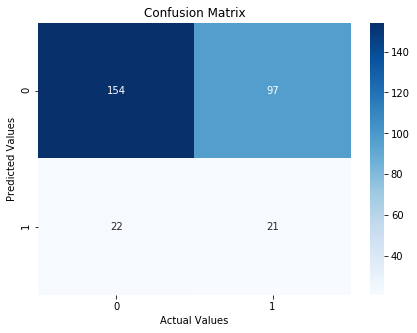

In [116]:
tab8 = confusion_matrix(att3_y_test, pred_log2)

plt.figure(figsize =(7,5))
sns.heatmap(tab8, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [117]:
accuracy8 = accuracy_score(pred_log2, att3_y_test)
accuracy8

0.5952380952380952

---

## Decision Tree Model 2

In [119]:
dtree2 = DecisionTreeClassifier(class_weight='balanced')

In [120]:
dtree2.fit(att3_x_train, att3_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [121]:
pred_dt2 = dtree2.predict(att3_x_test)
pred_dt2

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

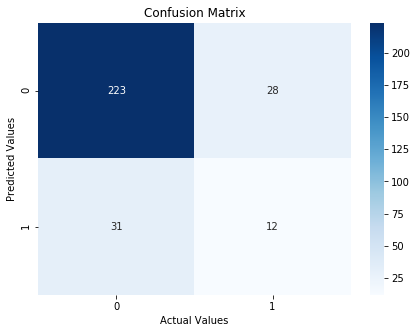

In [122]:
tab9 = confusion_matrix(att3_y_test, pred_dt2)

plt.figure(figsize =(7,5))
sns.heatmap(tab9, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [123]:
accuracy9 = accuracy_score(pred_dt2, att3_y_test)
accuracy9

0.7993197278911565

---

## Random Forest Model 3

In [145]:
rfc3 = RandomForestClassifier(class_weight='balanced')

In [146]:
rfc3.fit(att3_x_train, att3_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
pred_rfc3 = rfc3.predict(att3_x_test)
pred_rfc3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

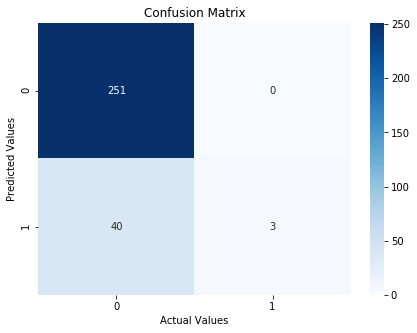

In [148]:
tab10 = confusion_matrix(att3_y_test, pred_rfc3)

plt.figure(figsize =(7,5))
sns.heatmap(tab10, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [149]:
accuracy10 = accuracy_score(pred_rfc3, att3_y_test)
accuracy10

0.8639455782312925

---

## Naive Bayes Model 2

In [150]:
naive_bay2 = MultinomialNB()

In [151]:
naive_bay2.fit(att3_x_train, att3_y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [152]:
pred_nb2 = naive_bay2.predict(att3_x_test)
pred_nb2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

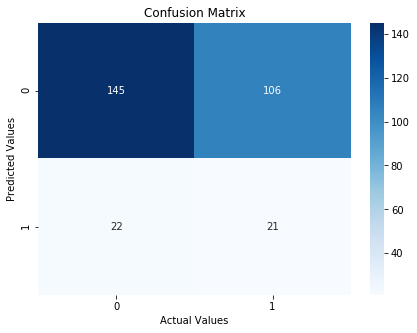

In [153]:
tab11 = confusion_matrix(att3_y_test, pred_nb2)

plt.figure(figsize =(7,5))
sns.heatmap(tab11, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [154]:
accuracy11 = accuracy_score(pred_nb2, att3_y_test)
accuracy11

0.564625850340136

---

## Support Vector Machine Model 2

In [156]:
svm2 = SVC(class_weight='balanced')

In [157]:
svm2.fit(att3_x_train, att3_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [158]:
pred_svm2 = svm2.predict(att3_x_test)
pred_svm2

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

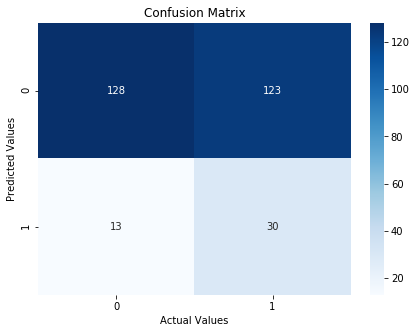

In [159]:
tab12 = confusion_matrix(att3_y_test, pred_svm2)

plt.figure(figsize =(7,5))
sns.heatmap(tab12, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [160]:
accuracy12 = accuracy_score(pred_svm2, att3_y_test)
accuracy12

0.5374149659863946

---

## KNN Model 2

In [161]:
knn2 = KNeighborsClassifier(n_neighbors = 7)

In [162]:
knn2.fit(att3_x_train, att3_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [163]:
pred_knn2 = knn2.predict(att3_x_test)
pred_knn2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

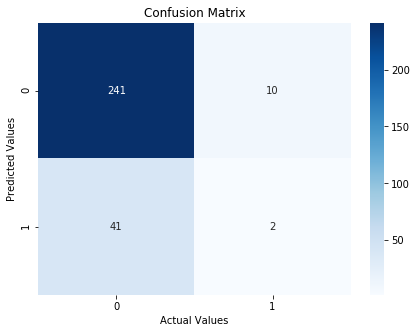

In [164]:
tab13 = confusion_matrix(att3_y_test, pred_knn2)

plt.figure(figsize = (7,5))
sns.heatmap(tab13, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [165]:
accuracy13 = accuracy_score(pred_knn2, att3_y_test)
accuracy13

0.826530612244898

### Even after implementing all basic classification algorithms we are getting good accuracy but the confusion matrix is not acceptable (TPR, FPR wise).

### Now, try to reduce the number of records that we had increased while doing oversampling to get rid of imbalanced dataset and implement Random Forest Classifier.

---

In [327]:
att4 = pd.concat([att, class_imb, class_imb])

In [328]:
att4.Attrition.value_counts()

0    1233
1     711
Name: Attrition, dtype: int64

In [329]:
att4_x = att4.drop(["Attrition"], axis = 1)
att4_y = att4.iloc[ : , 1]

In [330]:
att4_x_train, att4_x_test, att4_y_train, att4_y_test = train_test_split(att4_x, att4_y, test_size = 0.25, random_state = 555)

In [331]:
rfc4 = RandomForestClassifier()
rfc4.fit(att4_x_train, att4_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [332]:
pred_rfc4 = rfc4.predict(att4_x_test)
pred_rfc4

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

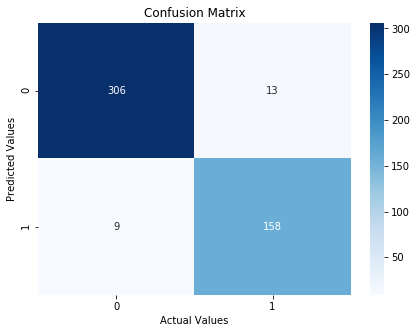

In [333]:
tab14 = confusion_matrix(att4_y_test, pred_rfc4)

plt.figure(figsize =(7,5))
sns.heatmap(tab14, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [334]:
accuracy14 = accuracy_score(pred_rfc4, att4_y_test)
accuracy14

0.9547325102880658

In [335]:
# to find area under the curve value
att_auc_score4 = roc_auc_score(att4_y_test, pred_rfc4)
att_auc_score4

0.9526777166669795

In [336]:
pred_value_prob4 = rfc4.predict_proba(att4_x_test)
pred_value_prob4 = pd.DataFrame(pred_value_prob4)
pred_value_prob4

,0,1
0,0.25,0.75
1,0.83,0.17
2,0.78,0.22
3,0.83,0.17
4,0.21,0.79
...,...,...
481,0.88,0.12
482,0.28,0.72
483,0.10,0.90
484,0.11,0.89


In [337]:
pred_value_prob4 = pred_value_prob4.iloc[ : , -1]

In [338]:
fpr4, tpr4, threshold4 = roc_curve(att4_y_test, pred_value_prob4)

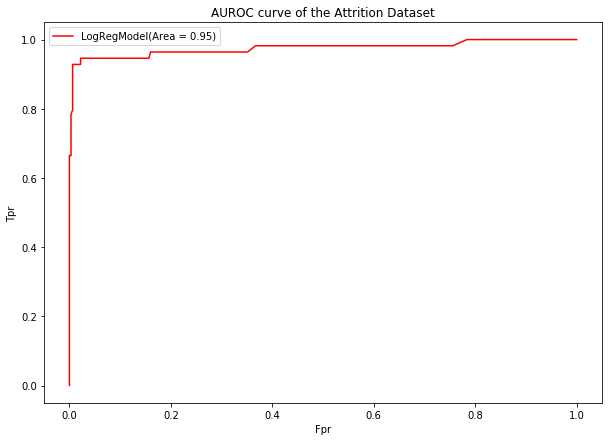

In [339]:
plt.figure(figsize = (10,7))
plt.plot(fpr4, tpr4, color = "red", label = "LogRegModel(Area = %0.2f)" % att_auc_score4)
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("AUROC curve of the Attrition Dataset")
plt.legend(loc = "upper left")

#### Now, we are getting good accuracy and TPR, FPR.